In [1]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [2]:
df.head()
data=df

In [3]:
label = data["DEATH_EVENT"]
data = data.drop(["DEATH_EVENT"], axis=1, inplace=False)
# label.head()


In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [5]:
# Normalization
mean = data.iloc[:, 0:13].mean(axis=0)
data.iloc[:, 0:13] -= mean
std = data.iloc[:, 0:13].std(axis=0)
data.iloc[:, 0:13] /= std


In [6]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.190949,-0.869647,0.000165,-0.846161,-1.527998,1.356997,1.678834e-02,0.489237,-1.501519,0.734457,-0.686531,-1.626775
1,-0.490457,-0.869647,7.502063,-0.846161,-0.007065,-0.734457,7.523048e-09,-0.284076,-0.141739,0.734457,-0.686531,-1.601007
2,0.350246,-0.869647,-0.449186,-0.846161,-1.527998,-0.734457,-1.036336e+00,-0.090748,-1.728149,0.734457,1.451727,-1.588122
3,-0.910808,1.146046,-0.485257,-0.846161,-1.527998,-0.734457,-5.455595e-01,0.489237,0.084892,0.734457,-0.686531,-1.588122
4,0.350246,1.146046,-0.434757,1.177856,-1.527998,-0.734457,6.507077e-01,1.262550,-4.674340,-1.356997,-0.686531,-1.575238


In [11]:
import numpy as np
# for seperating 70 percent of data
np.random.seed(11111)
msk = np.random.rand(len(data)) < 0.70
train_data = data[msk]
test_data = data[~msk]

train_label = label[msk]
test_label = label[~msk]

In [16]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
np.random.seed(11111)
msk = np.random.rand(len(data)) < 0.70
train_data = data[msk]
test_data = data[~msk]

In [18]:
train_label = label[msk]
test_label = label[~msk]

In [19]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [20]:
decision_tree.fit(train_data, train_label)

DecisionTreeClassifier(random_state=42)

In [21]:
test_predictions = decision_tree.predict(test_data)

In [22]:
accuracy = accuracy_score(test_label, test_predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7527


In [23]:
class_report = classification_report(test_label, test_predictions)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82        63
           1       0.61      0.63      0.62        30

    accuracy                           0.75        93
   macro avg       0.72      0.72      0.72        93
weighted avg       0.75      0.75      0.75        93



In [26]:
conf_matrix = confusion_matrix(test_label, test_predictions)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[51 12]
 [11 19]]


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

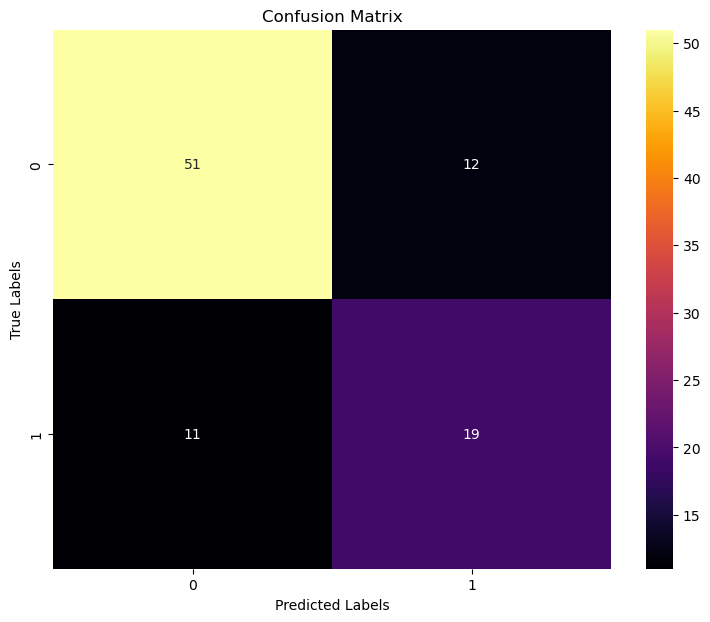

In [35]:
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=np.unique(test_label), yticklabels=np.unique(test_label))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
test_probabilities = decision_tree.predict_proba(test_data)[:, 1]


In [38]:
fpr, tpr, _ = roc_curve(test_label, test_probabilities)


In [39]:
auc = roc_auc_score(test_label, test_probabilities)

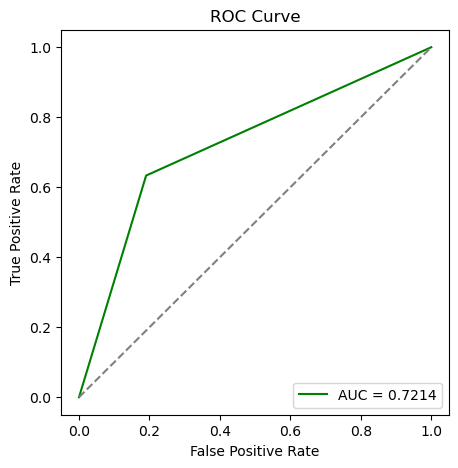

In [44]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='green', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
precision, recall, _ = precision_recall_curve(test_label, test_probabilities)


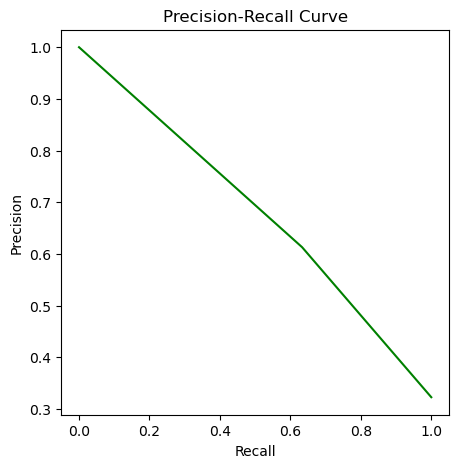

In [48]:
plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

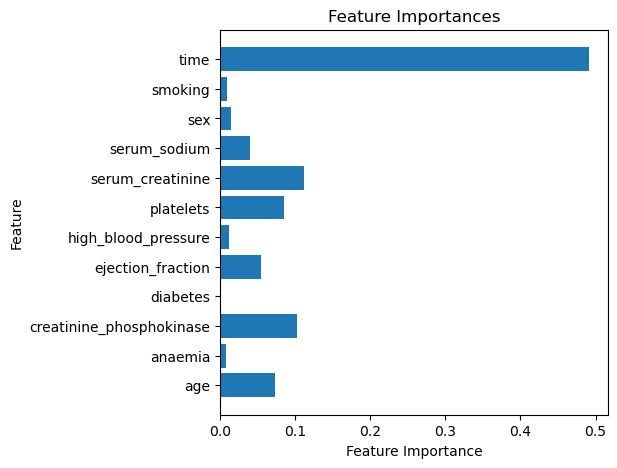

In [50]:
feature_importances = decision_tree.feature_importances_

plt.figure(figsize=(5, 5))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), train_data.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [51]:
pip install graphviz pydotplus


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 81.9/278.7 kB 573.4 kB/s eta 0:00:01
     ------------------- ---------------- 153.6/278.7 kB 833.5 kB/s eta 0:00:01
     -------------------------------------  276.5/278.7 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done

In [52]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import pydotplus


In [53]:
dot_data = export_graphviz(decision_tree, out_file=None, 
                           feature_names=train_data.columns,  
                           class_names=np.unique(train_label).astype(str),  
                           filled=True, rounded=True,  
                           special_characters=True)

In [54]:
graph = pydotplus.graph_from_dot_data(dot_data)


In [55]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [8]:

#train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 1 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       206 non-null    float64
 1   anaemia                   206 non-null    float64
 2   creatinine_phosphokinase  206 non-null    float64
 3   diabetes                  206 non-null    float64
 4   ejection_fraction         206 non-null    float64
 5   high_blood_pressure       206 non-null    float64
 6   platelets                 206 non-null    float64
 7   serum_creatinine          206 non-null    float64
 8   serum_sodium              206 non-null    float64
 9   sex                       206 non-null    float64
 10  smoking                   206 non-null    float64
 11  time                      206 non-null    float64
dtypes: float64(12)
memory usage: 20.9 KB


In [14]:
#train_label_np = train_label.to_numpy()
#train_data_np = train_data.to_numpy()

#train_data_np

In [12]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(train_data_np.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data_np, train_label_np, epochs=10, batch_size=32, validation_split=0.2, verbose = True)



ModuleNotFoundError: No module named 'tensorflow'

In [22]:
test_label_np = test_label.to_numpy()
test_data_np = test_data.to_numpy()

# Evaluate the model
loss, accuracy = model.evaluate(test_data_np, test_label_np)
print(f"Neural Network Accuracy: {accuracy:.2f}, and loss is {loss:2f}")

# import xgboost as xgb

# # Initialize the model
# model = xgb.XGBClassifier()

# # Train the model
# model.fit(train_label_np, train_data_np)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7138 - loss: 0.6150 
Neural Network Accuracy: 0.76, and loss is 0.577751
